In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm as normal
from zadania import LogisticRegression

In [ ]:
# DO ZABAWY NOTEBOOKIEM MOŻNA UŻYĆ "UDAWANEGO" ROZWIĄZANIA ZADANIA 5,
# TZN. REGRESJI OPAKOWUJĄCEJ MODEL Z SCIKIT-LEARN'A
# NA 99% BĘDZIE ONA SZYBSZA OD RĘCZNEJ IMPLEMENTACJI
"""
import numpy as np
from sklearn.linear_model import LogisticRegression as SLR

class LogisticRegression:

    def __init__(self, X, y):
        self.model = SLR()
        self.model.fit(X, y.ravel())

    @property
    def w(self):
        return self.model.coef_.copy().ravel()

    @property
    def b(self):
        return self.model.intercept_.copy().ravel()

    def predict_proba(self, X):
        return self.model.predict_proba(X)

    def predict(self, X):
        return (self.predict_proba(X)[:,1].reshape(-1,1) >= .5).astype(np.uint8)
"""

In [3]:
class Normal:
    def __init__(self, mean, sigma):
        assert isinstance(mean, float)
        assert isinstance(sigma, float)
        self.mean = mean
        self.sigma = sigma
    def pdf(self, x):
        return normal(self.mean, self.sigma).pdf(x)
    def sample(self, n_samples, seed=43):
        rng = np.random.RandomState(seed=seed)
        return rng.normal(self.mean, self.sigma, size=n_samples)

class Uniform:
    def __init__(self, mean, scale):
        assert isinstance(mean, float)
        assert isinstance(scale, float)
        self.mean = mean
        self.scale = scale
    def pdf(self, x):
        result = (np.abs(x - self.mean) <= .5 * self.scale)
        result = result.astype(np.float32).ravel() / (self.scale)
        return result
    def sample(self, n_samples, seed=43):
        rng = np.random.RandomState(seed=seed)
        return rng.uniform(self.mean - .5 * self.scale, self.mean + .5 * self.scale, size=n_samples)


In [4]:
def fit(distr_a, distr_b, n_a, n_b, featurizer=(lambda x: np.array([x])), seed=43):
    a = distr_a.sample(n_a, seed=4*seed)
    b = distr_b.sample(n_b, seed=3*seed)
    x = np.array([featurizer(x) for x in np.hstack((a,b))])
    y = np.hstack((np.zeros(n_a), np.ones(n_b)))
    return LogisticRegression(x, y)

def fit_and_draw(distr_a, distr_b, n_a, n_b, featurizer=(lambda x: np.array([x])), seed=43):
    a = distr_a.sample(n_a, seed=4*seed)
    b = distr_b.sample(n_b, seed=3*seed)
    x = np.array([featurizer(x) for x in np.hstack((a,b))])
    y = np.hstack((np.zeros(n_a), np.ones(n_b)))
    l = LogisticRegression(x, y)
    _x = np.linspace(-3., 3., 20000)
    _x_f = np.array([featurizer(x) for x in _x])
    _y = l.predict(_x_f).ravel()
    _y_proba = l.predict_proba(_x_f)
    fig = plt.figure(figsize=(7,8))
    ax = fig.add_subplot(2,1,1)
    ax.plot(_x, (n_a / (n_a + n_b)) * distr_a.pdf(_x), label="Class 0", color="red", linewidth=2, alpha=.7)
    ax.plot(_x, (n_b / (n_a + n_b)) * distr_b.pdf(_x), label="Class 1", color="orange", linewidth=2, alpha=.7)
    ax.plot(_x, _y, label="Predicted class", color="blue", linewidth=1)
    ax.set_ylim(-1., 1.5)
    ax.legend()
    ax = fig.add_subplot(2,1,2)
    denom = (n_a * distr_a.pdf(_x) + n_b * distr_b.pdf(_x))
    ax.plot(_x, (n_a * distr_a.pdf(_x)) / denom, label="p(class=0|x)", color="red", linewidth=2, alpha=.7)
    ax.plot(_x, (n_b * distr_b.pdf(_x)) / denom, label="p(class=1|x)", color="orange", linewidth=2, alpha=.7)
    ax.plot(_x, _y_proba[:,0].ravel(), label="Predicted p(class=0|x)", color="red", linewidth=3, linestyle="--")
    ax.plot(_x, _y_proba[:,1].ravel(), label="Predicted p(class=1|x)", color="orange", linewidth=3, linestyle="--")
    ax.set_ylim(-1., 1.5)
    ax.legend()


### Regresja logistyczna - udajemy, że rozumiemy

Zacznijmy od sprawdzenia, jak regresja logistyczna poradzi sobie z danymi, które pochodzą z dwóch rozkładów normalnych (każdy z nich to osobna klasa).

<IPython.core.display.Javascript object>


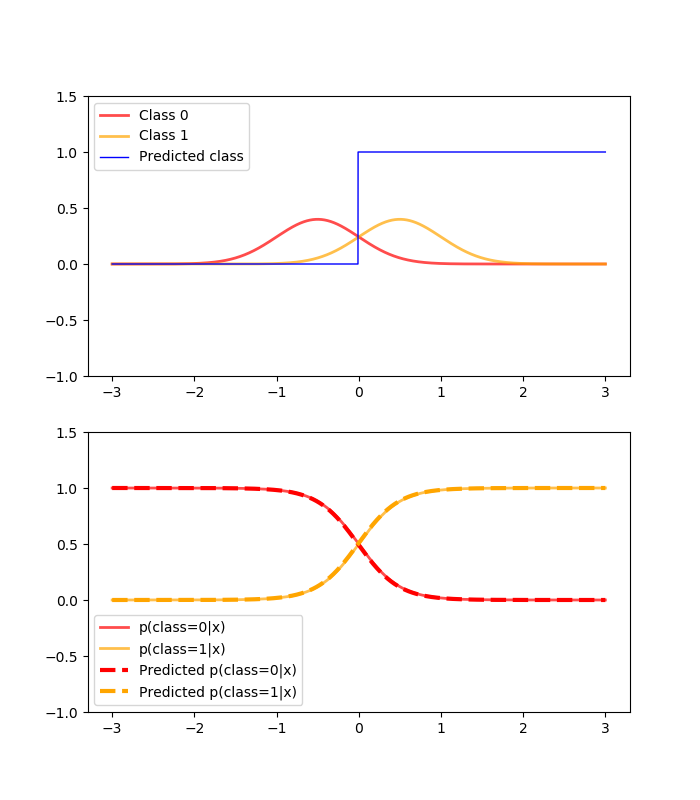

In [5]:
fit_and_draw(
    distr_a=Normal(-.5, .5),
    distr_b=Normal(.5, .5),
    n_a=5000,
    n_b=5000)

Prawdopodobieństwa warunkowe zostały idealnie zamodelowane, a granica decyzyjna znajduje się we właściwym miejscu.

Spróbujmy teraz nieco utrudnić zadanie - niech jedna z klas będzie trzy razy liczniejsza od drugiej.

<IPython.core.display.Javascript object>


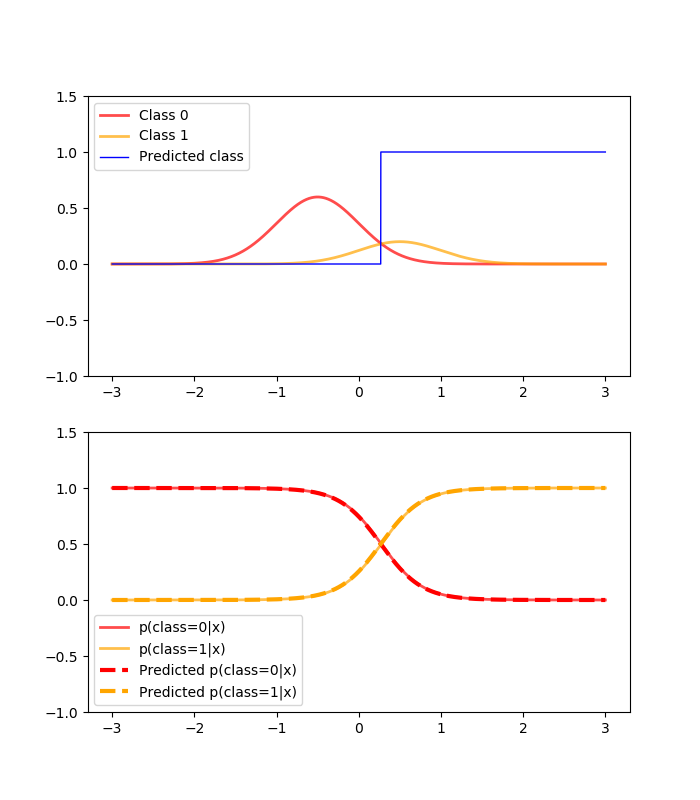

In [6]:
fit_and_draw(
    distr_a=Normal(-.5, .5),
    distr_b=Normal(.5, .5),
    n_a=15000,
    n_b=5000)

Nadal jest ok.

Ostatni test - spróbujmy użyć dwóch rozkładów normalnych, które mają różną wariancję.

<IPython.core.display.Javascript object>


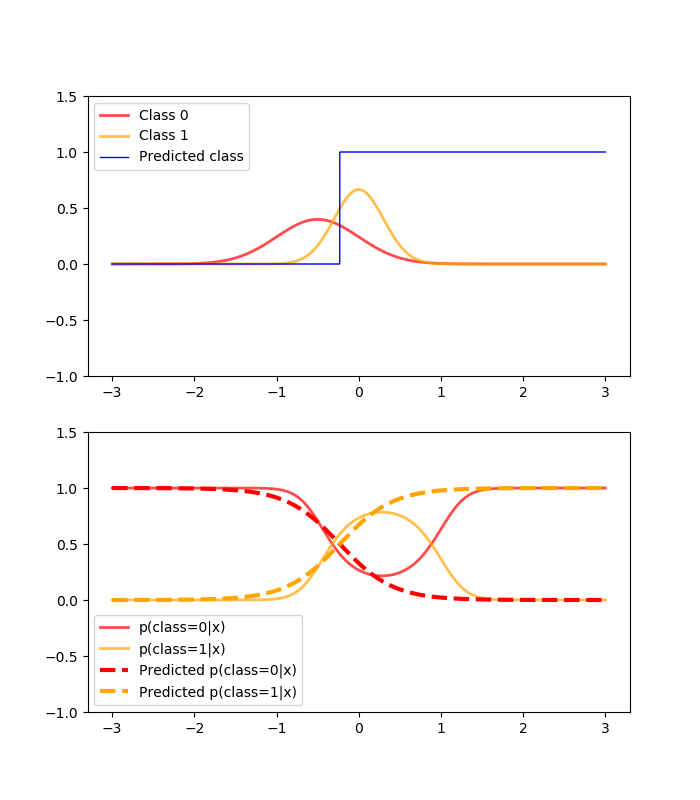

In [7]:
fit_and_draw(
    distr_a=Normal(-.5, .5),
    distr_b=Normal(0., .3),
    n_a=5000,
    n_b=5000)

Prawdopodobieństwa warunkowe mają dziwny kształ i granica decyzyjna jest odrobinę przesunięta w stosunku do optymalnego położenia.

Sprawdźmy, czy w wypadku rozkładów jednostajnych będzie podobnie.

<IPython.core.display.Javascript object>


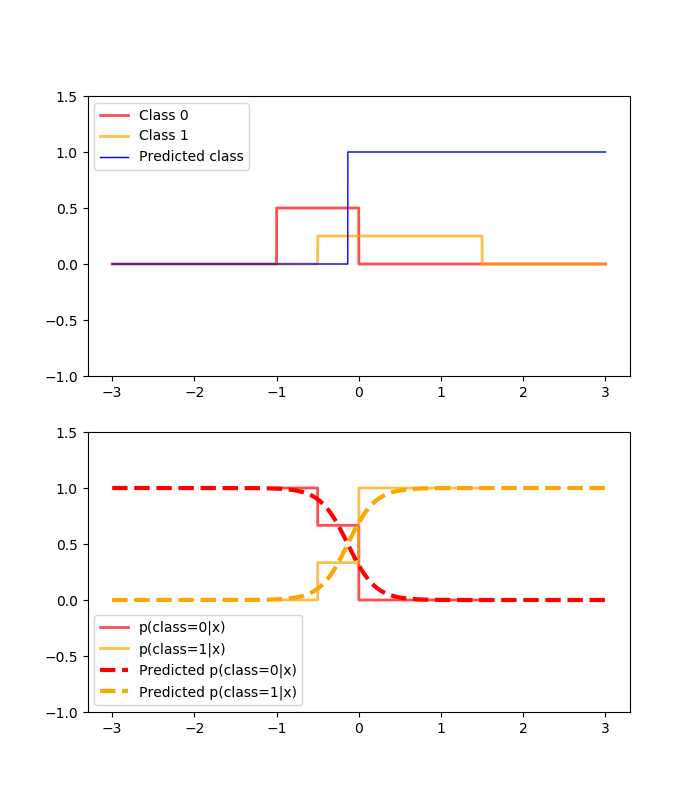

/home/ml/miniconda3/envs/ml2018/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ml/miniconda3/envs/ml2018/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


In [8]:
fit_and_draw(
    distr_a=Uniform(-.5, 1.),
    distr_b=Uniform(.5, 2.),
    n_a=5000,
    n_b=5000)

(błąd dzielenia przez 0 pojawia się przy rysowaniu wykresów, nie przejmujemy się nim, ponieważ sytuacja zachodzi dla x'ów, których prawdopodobieństwo jest zerowe)

Ten sam problem.

Spróbujmy naprawić nasz model. Wiemy, że czasem pomaga zastosowanie transformacji na zmiennych wejściowych. Weźmy na przykład transformację wielomianową. Na początek sprawdźmy wielomian drugiego stopnia.

<IPython.core.display.Javascript object>


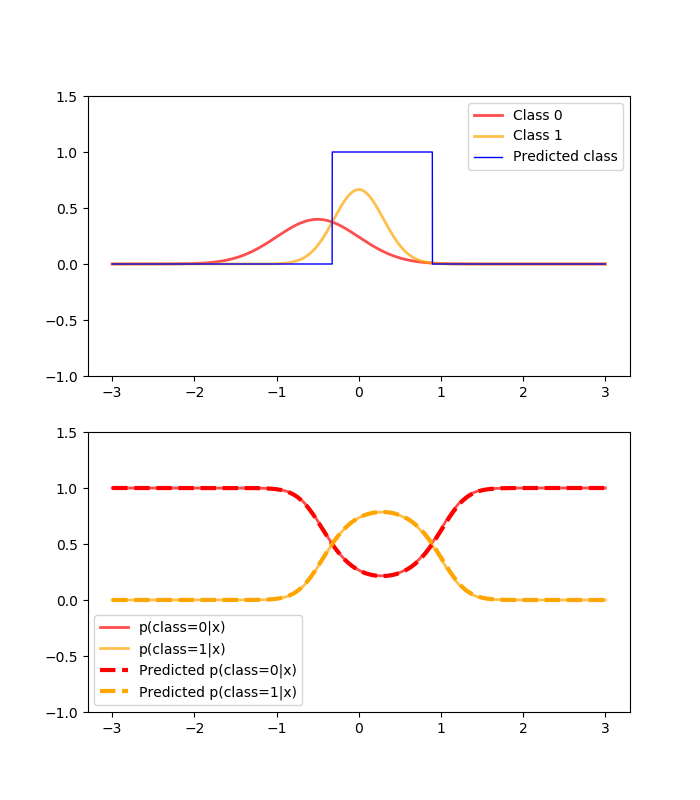

In [9]:
fit_and_draw(
    distr_a=Normal(-.5, .5),
    distr_b=Normal(0., .3),
    n_a=5000,
    n_b=5000,
    featurizer=(lambda x: np.array([x, x**2]))) # każdy x zastępujemy parą (x, x^2)

Udało się! Prawdopodobieństwa warunkowe znowu są idealnie dopasowane.

Ponadto widzimy, że prosta pozioma została teraz podzielona na trzy, a nie dwa obszary decyzyjne. Czy to dobrze? Zmniejszmy wariancję drugiego rozkładu, żeby otrzymać wyraźniejszy wykres.

<IPython.core.display.Javascript object>


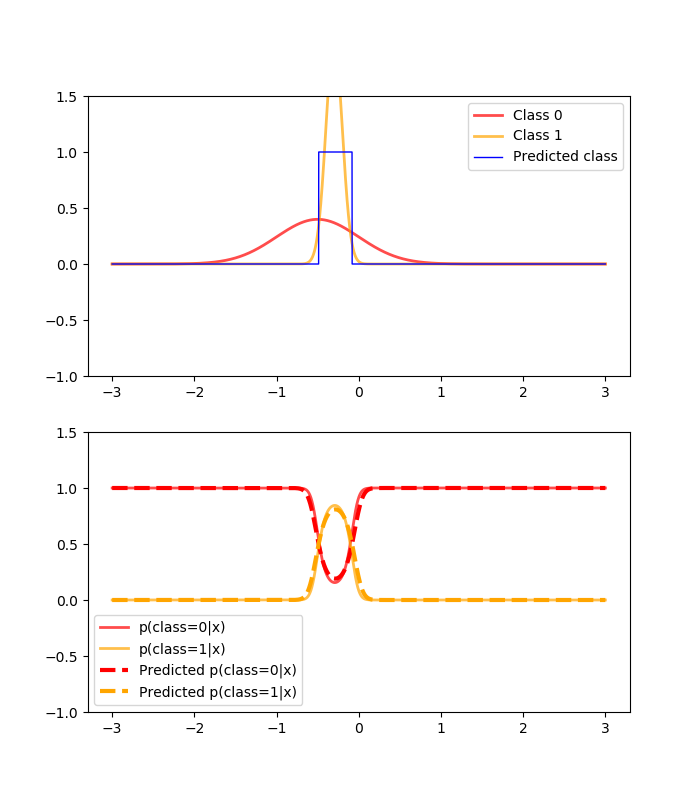

In [10]:
fit_and_draw(
    distr_a=Normal(-.5, .5),
    distr_b=Normal(-.3, .1),
    n_a=25000,
    n_b=25000,
    featurizer=(lambda x: np.array([x, x**2])))

Faktycznie w tym wypadku opłaca się przewidywać klasę 1 tylko na zaznaczonym odcinku.

Spróbujmy teraz postąpić podobnie w wypadku rozkładów jednostajnych.

<IPython.core.display.Javascript object>


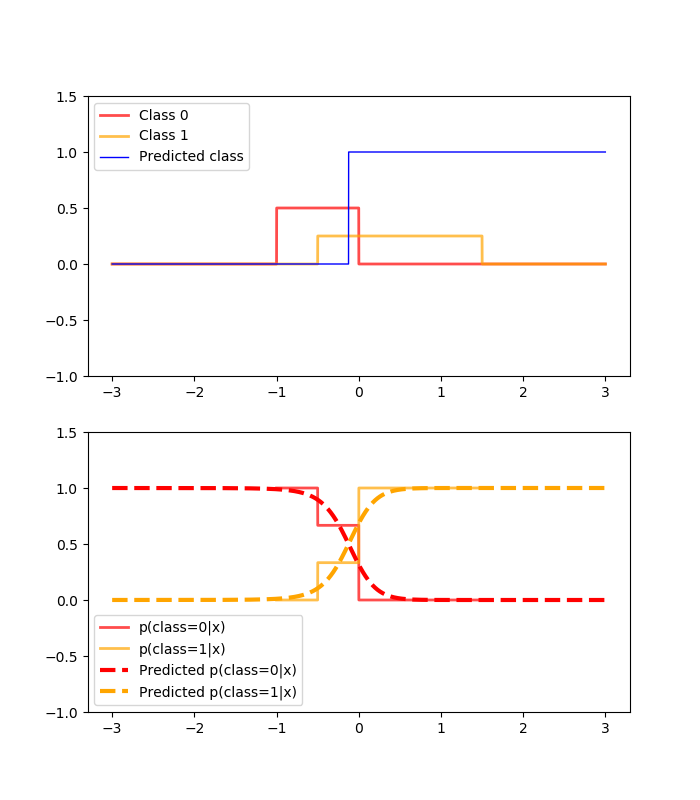

/home/ml/miniconda3/envs/ml2018/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ml/miniconda3/envs/ml2018/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


In [11]:
fit_and_draw(
    distr_a=Uniform(-.5, 1.),
    distr_b=Uniform(.5, 2.),
    n_a=5000,
    n_b=5000,
    featurizer=(lambda x: np.array([x, x**2])))

Dziwne, dalej nie działa. Może musimy użyć wielomianu wyższego stopnia?

/home/ml/miniconda3/envs/ml2018/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


<IPython.core.display.Javascript object>


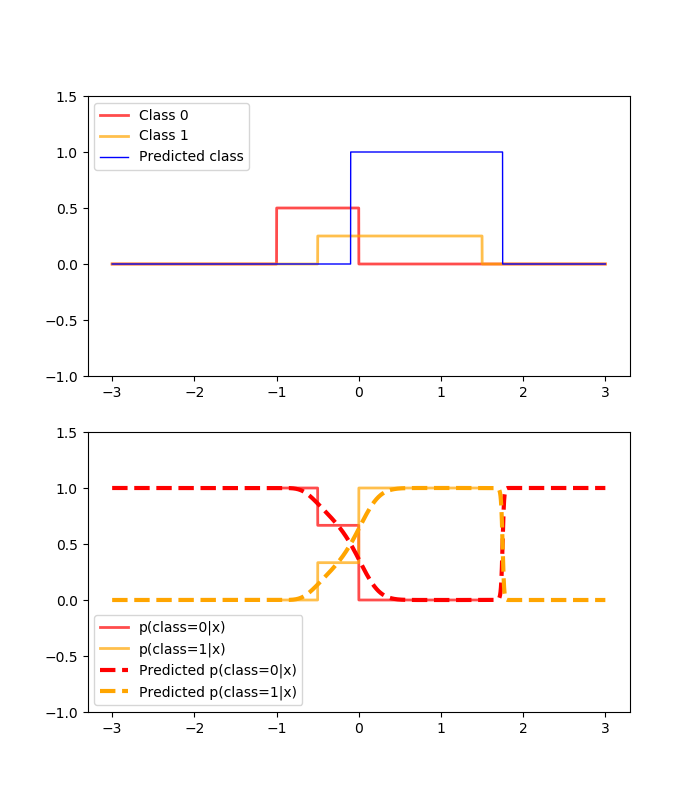

/home/ml/miniconda3/envs/ml2018/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ml/miniconda3/envs/ml2018/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


In [12]:
fit_and_draw(
    distr_a=Uniform(-.5, 1.),
    distr_b=Uniform(.5, 2.),
    n_a=5000,
    n_b=5000,
    featurizer=(lambda x: np.array([x, x**2, x**3, x**4, x**5, x**6]))) # wielomian szóstego stopnia

Dalej nie działa - o co chodzi?

### Regresja logistyczna - piszemy wzory i rozumiemy

Regresja logistyczna działa dla dwóch rozkładów normalnych o tej samej wariancji, ponieważ __została zaprojektowana__ tak, aby działać dla dwóch rozkładów normalnych o tej samej wariancji.

Nie ma żadnej "intuicji" stojącej za postacią funkcji sigmoidalnej. Wynika ona po prostu ze wzoru na gęstość rozkładu normalnego. Wszystkie "przydatne własności" tej funkcji (np. prosty wzór na pochodną) dostajemy przy okazji.

Jeśli nasz model danych zakłada dwie równoliczne klasy:
* $p(x,c_1) = \dfrac12\cdot N(\mu_1, \sigma_1) = \dfrac12\cdot \dfrac{1}{\sqrt{2\pi\sigma_1}}\exp(\dfrac{(x-\mu_1)^2}{2\sigma_1^2})$
* $p(x,c_2) = \dfrac12\cdot N(\mu_2, \sigma_2) = \dfrac12\cdot \dfrac{1}{\sqrt{2\pi\sigma_2}}\exp(\dfrac{(x-\mu_2)^2}{2\sigma_2^2})$

to wtedy:
$p(c_1\mid x) = 
\dfrac{N(\mu_1, \sigma_1)}{N(\mu_1, \sigma_1) + N(\mu_2, \sigma_2)} =
\dfrac{1}{1 + \dfrac{N(\mu_2, \sigma_2)}{N(\mu_1, \sigma_1)}}$

ale:

$\dfrac{N(\mu_2, \sigma_2)}{N(\mu_1, \sigma_1)} = 
\sqrt{\dfrac{\sigma_1}{\sigma_2}}\exp(\dfrac{(x-\mu_2)^2}{2\sigma_2^2} - \dfrac{(x-\mu_1)^2}{2\sigma_1^2}) =
exp(- ( - \frac12\ln(\dfrac{\sigma_1}{\sigma_2}) + \dfrac{(x-\mu_1)^2}{2\sigma_1^2} - \dfrac{(x-\mu_2)^2}{2\sigma_2^2}))$

zapisując:

$A = - \frac12\ln(\dfrac{\sigma_1}{\sigma_2}) + \dfrac{(x-\mu_1)^2}{2\sigma_1^2} - \dfrac{(x-\mu_2)^2}{2\sigma_2^2}$

mamy ostatecznie:
$p(c_1\mid x) = \dfrac{1}{1 + \exp(-A)} = \sigma(A)$

Cała zabawa ze wzorami polegała na tym, żeby doprowadzić $A$ do takiej postaci, którą można modelować funkcją $A = w\cdot x + b$. Funkcja sigmoid stanowi połączenie pomiędzy postacią $A$ i wzorami na rozkład normalny, dlatego jest w niej m.in. fragment $\exp$. Czy faktycznie $A$ zależy teraz afinicznie od $x$? Załóżmy najpierw, że $\sigma_1 = \sigma_2 = \sigma$ i rozpiszmy:

$\begin{align}
A = &- \frac12\ln(\dfrac{\sigma_1}{\sigma_2}) + \dfrac{(x-\mu_1)^2}{2\sigma_1^2} - \dfrac{(x-\mu_2)^2}{2\sigma_2^2} = \\
&= - \frac12\ln(\dfrac{\sigma}{\sigma}) + \dfrac{(x-\mu_1)^2}{2\sigma^2} - \dfrac{(x-\mu_2)^2}{2\sigma^2} = \\
&= \dfrac{(x-\mu_1)^2 - (x-\mu_2)^2}{2\sigma^2} = \\
&= \dfrac{x^2 - 2x\mu_1 + \mu_1^2 - x^2 + 2x\mu_2 - \mu_2^2}{2\sigma^2} = \\
&= \dfrac{\mu_2-\mu_1}{\sigma^2}\cdot x + \dfrac{\mu_1^2-\mu_2^2}{2\sigma^2}
\end{align}$

czyli:
* $ w = \dfrac{\mu_2-\mu_1}{\sigma^2}$
* $ b = \dfrac{\mu_1^2-\mu_2^2}{2\sigma^2}$

Możemy sprawdzić doświadczalnie, że właśnie takich parametrów uczy się nasza regresja logistyczna:

In [13]:
mu_1 = -.5
mu_2 = .4
sigma = .3

lr = fit(
    distr_a=Normal(mu_1, sigma),
    distr_b=Normal(mu_2, sigma),
    n_a=5000,
    n_b=5000)

print("10000 sampli:")
print("w ze wzorów:", (mu_2 - mu_1) / sigma**2)
print("w z regresji:", lr.w)
print("b ze wzorów:", (mu_1**2 - mu_2**2) / (2 * sigma**2))
print("b z regresji:", lr.b)

lr = fit(
    distr_a=Normal(mu_1, sigma),
    distr_b=Normal(mu_2, sigma),
    n_a=500000,
    n_b=500000)

print("")
print("1000000 sampli:")
print("w ze wzorów:", (mu_2 - mu_1) / sigma**2)
print("w z regresji:", lr.w)
print("b ze wzorów:", (mu_1**2 - mu_2**2) / (2 * sigma**2))
print("b z regresji:", lr.b)

10000 sampli:
w ze wzorów: 10.0
w z regresji: [ 9.68186928]
b ze wzorów: 0.49999999999999983
b z regresji: [ 0.54452195]

1000000 sampli:
w ze wzorów: 10.0
w z regresji: [ 9.98672036]
b ze wzorów: 0.49999999999999983
b z regresji: [ 0.50140455]


(Warto pamiętać, że w powyższych wzorach zakładamy jednakową liczność klas.)

Zgadza się.

A co jeśli $\sigma_1 \neq \sigma_2$? Pamiętamy, że transformacja $(x, x^2)$ w jakiś sposób pomogła. Sprawdźmy, co tak naprawdę się stało:

$\begin{align}
A = &- \frac12\ln(\dfrac{\sigma_1}{\sigma_2}) + \dfrac{(x-\mu_1)^2}{2\sigma_1^2} - \dfrac{(x-\mu_2)^2}{2\sigma_2^2} = \\
&= \ldots = \\
&= x^2\cdot(\dfrac{1}{2\sigma_1^2} - \dfrac{1}{2\sigma_2^2}) +
x\cdot(\dfrac{\mu_2}{\sigma_2^2}-\dfrac{\mu_1}{\sigma_1^2}) +
(\dfrac{\mu_1^2}{\sigma_1^2} - \dfrac{\mu_2^2}{\sigma_2^2} - \dfrac12\ln(\dfrac{\sigma_1}{\sigma_2}))
\end{align}$

czyli po zmianie zmiennych:
* $ w = ((\dfrac{\mu_2}{\sigma_2^2}-\dfrac{\mu_1}{\sigma_1^2}), (\dfrac{1}{2\sigma_1^2} - \dfrac{1}{2\sigma_2^2}))$
* $ b = \dfrac{\mu_1^2}{\sigma_1^2} - \dfrac{\mu_2^2}{\sigma_2^2} - \dfrac12\ln(\dfrac{\sigma_1}{\sigma_2})$

I znowu możemy sprawdzić doświadczalnie, że wzory się zgadzają:

In [14]:
mu_1 = -.5
mu_2 = .4
sigma_1 = .3
sigma_2 = .8

lr = fit(
    distr_a=Normal(mu_1, sigma_1),
    distr_b=Normal(mu_2, sigma_2),
    n_a=5000,
    n_b=5000,
    featurizer=(lambda x: np.array([x, x**2])))

print("10000 sampli:")
print("w ze wzorów:", ((mu_2 / sigma_2**2 - mu_1 / sigma_1**2), (1. / (2. * sigma_1**2) - 1. / (2. * sigma_2**2))))
print("w z regresji:", lr.w)
print("b ze wzorów:", mu_1**2 / sigma_1**2 - mu_2**2 / sigma_2**2 - .5 * np.log(sigma_1 / sigma_2))
print("b z regresji:", lr.b)

lr = fit(
    distr_a=Normal(mu_1, sigma_1),
    distr_b=Normal(mu_2, sigma_2),
    n_a=500000,
    n_b=500000,
    featurizer=(lambda x: np.array([x, x**2])))

print("")
print("1000000 sampli:")
print("w ze wzorów:", ((mu_2 / sigma_2**2 - mu_1 / sigma_1**2), (1. / (2. * sigma_1**2) - 1. / (2. * sigma_2**2))))
print("w z regresji:", lr.w)
print("b ze wzorów:", mu_1**2 / sigma_1**2 - mu_2**2 / sigma_2**2 - .5 * np.log(sigma_1 / sigma_2))
print("b z regresji:", lr.b)


10000 sampli:
w ze wzorów: (6.180555555555555, 4.774305555555555)
w z regresji: [ 5.90970311  4.56831155]
b ze wzorów: 3.01819240428
b z regresji: [ 0.27212522]

1000000 sampli:
w ze wzorów: (6.180555555555555, 4.774305555555555)
w z regresji: [ 6.19190316  4.79231882]
b ze wzorów: 3.01819240428
b z regresji: [ 0.28290005]


Nie ma więc nic dziwnego w tym, że dla rozkładów jednostajnych transformacje wielomianowe nie pomogły - gęstości rozkładów jednostajnych wyglądają zupełnie inaczej, niż w wypadku rozkładu normalnego.

### Refleksja

Założenie o gaussowskości danych jest bardzo ograniczające. Dołożenie warunku o równych wariancjach tylko pogarsza sprawę. Możemy domyślić się, że w większej liczbie wymiarów i dla większej liczby klas będzie jeszcze gorzej.

Nie mniej jednak (chyba) wszystkie sieci neuronowe używane w problemach klasyfikacji kończą się funkcją sigmoid lub softmax. Oznacza to, że cała sieć musi przerobić prawdziwy rozkład danych do takiej postaci, która jest rozumiana przez regresję logistyczną. Warto o tym pamiętać.